## Подготовка

In [ ]:
# pip install PyPortfolioOpt
# pip install pandas_datareader

### Импорты

In [32]:
import numpy as np
import pandas as pd
from pandas_datareader import data

from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import plotting
from copy import deepcopy

import yfinance as yf
import pandas_datareader as pdr

### Сбор данных

[Источник данных по голубым фишкам на МосБирже](https://investfunds.ru/stocks/?auto=1&limit=50)

In [2]:
blue_chips_names = np.array(
    ['GAZP', 'GEMC', 'YNDX', 'VKCO', 'POSI', 'FLOT', 'UNAC', 'NMTP', 'FESH', 'PIKK', 'AFLT',
     'DSKY', 'MVID', 'MGNT', 'OZON', 'POLY', 'ALRS', 'NLMK', 'PHOR', 'MTSS', 'SBER', 'TCSG', 
     'IRAO', 'NVTK', 'ROSN']
)
blue_chips_names.astype(str)

# blue_chips_mcap = np.array(
#     [
#         2_795.81, 6_587.80, 43_593.26, 29_192.51, 56_314.28, 7_334.82, 5_784.72, 11_889.03, 51_179.51, 17_013.63, 70_979.28, 67_433.18, 12_825.20, 15_703.95, 10_500.55
#     ]
# )

# df_blue_chips = pd.DataFrame(
#     {
#         'names': blue_chips_names,
#         'MCap': blue_chips_mcap
#     }
# )
# df_blue_chips.sort_values(by='MCap', ascending=False, inplace=True)
# df_blue_chips.reset_index(inplace=True, drop=True)
# df_blue_chips

array(['GAZP', 'GEMC', 'YNDX', 'VKCO', 'POSI', 'FLOT', 'UNAC', 'NMTP',
       'FESH', 'PIKK', 'AFLT', 'DSKY', 'MVID', 'MGNT', 'OZON', 'POLY',
       'ALRS', 'NLMK', 'PHOR', 'MTSS', 'SBER', 'TCSG', 'IRAO', 'NVTK',
       'ROSN'], dtype='<U4')

In [ ]:
# initial_date = "2020-04-20"
# today = datetime.today().strftime('%Y-%m-%d')

# # download dataframe
# data = pdr.get_data_moex(['FIVE'], start=initial_date, end=today)['CLOSE']
# data

# type(data)

In [ ]:
# data1 = pdr.get_data_moex(['GMKN'], start=initial_date, end=today)['CLOSE']
# data1

In [ ]:
# data2 = pdr.get_data_moex(['FIVE', 'GMKN'], start=initial_date, end=today)['CLOSE']
# data2

In [3]:
def make_stock_table(start_date, end_date, stocks=blue_chips_names, market_proxy='IMOEX'):
    df = pd.DataFrame()
    for stock in stocks:
        cur_series = pdr.get_data_moex(stock, start=start_date, end=end_date)['CLOSE']
        df[stock] = cur_series
    cur_series = pdr.get_data_moex(market_proxy, start=start_date, end=end_date)['CLOSE']
    df_market_proxy = cur_series.to_frame()
    del cur_series

    return df, df_market_proxy

In [5]:
import warnings
warnings.filterwarnings('ignore')

# берем данные за 5 лет
df_assets, df_benchmark = make_stock_table('31-10-2018', '31-10-2023')

In [33]:
small_df = deepcopy(df_assets)

In [38]:
df_assets = small_df.drop(['GEMC', 'VKCO', 'POSI', 'FLOT', 'TCSG', 'OZON'], axis=1)

In [39]:
df_assets

,GAZP,YNDX,UNAC,NMTP,FESH,PIKK,AFLT,DSKY,MVID,MGNT,POLY,ALRS,NLMK,PHOR,MTSS,SBER,IRAO,NVTK,ROSN
TRADEDATE,,,,,,,,,,,,,,,,,,,
2018-10-31,155.47,1916.5,0.8090,6.135,4.990,352.3,97.25,89.50,398.5,3590.0,608.0,99.90,160.42,2470.0,257.60,189.80,3.9820,1049.8,460.45
2018-11-01,153.50,1999.0,0.8230,6.150,5.055,353.7,96.88,90.38,401.7,3640.0,624.0,100.70,159.06,2480.0,258.25,188.67,3.9985,1082.1,460.00
2018-11-02,153.71,1995.0,0.8270,6.185,5.110,353.2,101.78,90.76,407.0,3660.0,619.4,101.60,157.94,2509.0,262.20,192.60,3.9445,1080.4,459.60
2018-11-06,156.00,2002.0,0.8480,6.315,5.125,353.4,102.40,90.50,404.9,3695.0,615.0,103.04,157.92,2527.0,264.00,197.80,4.0000,1081.6,482.45
2018-11-07,157.85,1995.0,0.8550,6.525,5.090,351.2,100.60,90.30,407.2,3720.0,625.0,103.00,157.60,2532.0,270.95,201.90,4.0245,1103.8,484.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-25,169.62,2737.0,1.8785,12.895,95.680,751.0,40.87,71.42,199.9,6046.5,549.5,71.54,191.68,6877.0,283.85,273.73,4.5000,1695.0,590.50
2023-10-26,168.45,2682.4,1.8080,12.640,93.710,742.4,39.98,71.42,195.9,5913.0,543.0,70.79,192.10,6810.0,279.55,269.90,4.3735,1682.0,583.00
2023-10-27,167.26,2666.6,1.8085,12.620,93.140,730.9,40.26,71.42,192.8,6015.0,547.3,70.74,191.50,6790.0,282.15,269.70,4.3785,1678.4,594.60


In [40]:
df_benchmark.rename(columns={'CLOSE': "IMOEX"}, inplace=True)
df_benchmark

,IMOEX
TRADEDATE,
2018-10-31,2352.71
2018-11-01,2359.33
2018-11-02,2377.95
2018-11-06,2412.31
2018-11-07,2445.34
...,...
2023-10-25,3265.28
2023-10-26,3223.89
2023-10-27,3224.18


In [41]:
def plot_stock_performance(df1, df2=None, df2_col='IMOEX'):
    plt.figure(figsize=(12, 5))
    for col in df1.columns.values:
        sns.lineplot(data=df1[col], label=col)
    sns.lineplot(data=df2[df2_col], label=df2_col, linestyle='--')
    plt.title('Price of the Stocks')
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Price in RUR', fontsize=18)
    plt.legend(
        np.append(df1.columns.values, df2_col), loc='upper left'
    )
    plt.show();

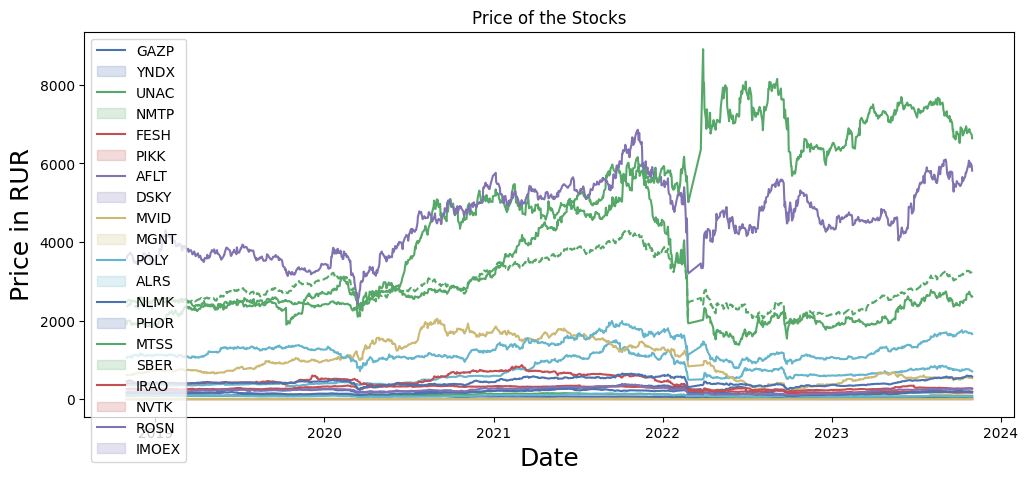

In [42]:
plot_stock_performance(df1=df_assets, df2=df_benchmark)

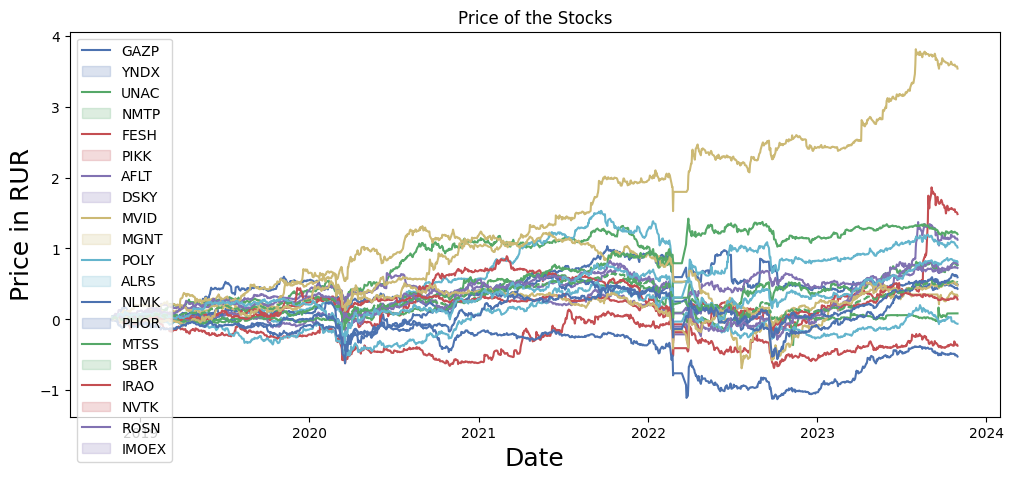

In [43]:
plot_stock_performance(
    df1=df_assets.pct_change()[1:].cumsum(), 
    df2=df_benchmark.pct_change()[1:].cumsum()
)

In [ ]:
# df = np.log(df).diff()
# df = df.dropna()
# df

In [ ]:
# Are in fact the returns normally distributed?

# plt.figure(figsize=(12.2,4.5)) 
# for i in df.columns.values:
#     plt.hist( df[i],  label=i, bins = 200)
# plt.title('Returns Histogram')
# plt.xlabel('Fecha',fontsize=18)
# plt.ylabel('Precio en USD',fontsize=18)
# plt.legend(df.columns.values)
# plt.show();

## Построение портфеля

### Предпосылки

1. Не имеем доступа к зарубежным рынкам (по крайней мере в краткосрочной перспективе)
   
   - минимизируем политические риски заморозки активов
   - семья не имеет финансового образования и опыта в торговле на финансовых рынках, поэтому торговля на зарубежных рынках сопряжена и с бОльшими финансовыми рисками

<br>

2. Инвестируем в следующие классы активов: акции, облигации, депозиты, commodities?
   
   - деривативы являются более рисковым финансовым инструментом по сравнению с "более классическими" активами и в основном используются при построении стратегий ??
   - в семье нет квалифицированных инвесторов (если мы только рекомендуем активы, то ок; если же мы занимаемся доверительным управлением, то лажа)
   - насколько я понимаю, торговля commodities доступна только через фьючерсы, а этот фин. инструмент не доступен не квалифицированным инвесторам (или людям, прошедшим тест на знание соответствующих фин. инструментов)

<br>

3. Соотношение активов в портфеле: ? / ? / ? (...)
   
   - ...
   - ...

<br>

4. ERP = ...
5. Какой берем RFR?

### Подбор оптимальных весов

In [44]:
df_assets_performance = df_assets.pct_change()[1:]
df_benchmark_performance = df_benchmark.pct_change()[1:]

In [45]:
df_assets_performance

,GAZP,YNDX,UNAC,NMTP,FESH,PIKK,AFLT,DSKY,MVID,MGNT,POLY,ALRS,NLMK,PHOR,MTSS,SBER,IRAO,NVTK,ROSN
TRADEDATE,,,,,,,,,,,,,,,,,,,
2018-11-01,-0.012671,0.043047,0.017305,0.002445,0.013026,0.003974,-0.003805,0.009832,0.008030,0.013928,0.026316,0.008008,-0.008478,0.004049,0.002523,-0.005954,0.004144,0.030768,-0.000977
2018-11-02,0.001368,-0.002001,0.004860,0.005691,0.010880,-0.001414,0.050578,0.004204,0.013194,0.005495,-0.007372,0.008937,-0.007041,0.011694,0.015295,0.020830,-0.013505,-0.001571,-0.000870
2018-11-06,0.014898,0.003509,0.025393,0.021019,0.002935,0.000566,0.006092,-0.002865,-0.005160,0.009563,-0.007104,0.014173,-0.000127,0.007174,0.006865,0.026999,0.014070,0.001111,0.049717
2018-11-07,0.011859,-0.003497,0.008255,0.033254,-0.006829,-0.006225,-0.017578,-0.002210,0.005680,0.006766,0.016260,-0.000388,-0.002026,0.001979,0.026326,0.020728,0.006125,0.020525,0.003420
2018-11-08,-0.002154,-0.006516,-0.019883,0.016858,-0.001965,0.007403,-0.020875,0.005537,-0.019155,0.004032,0.008800,0.002330,-0.005076,-0.004739,0.009780,0.004903,-0.008572,-0.015039,-0.018798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-25,-0.003349,0.004330,0.008861,-0.008077,0.002515,-0.010801,0.001961,0.000000,-0.011375,-0.004364,0.006964,-0.011332,-0.014296,0.008506,0.013388,0.009068,-0.005745,0.009289,0.007335
2023-10-26,-0.006898,-0.019949,-0.037530,-0.019775,-0.020589,-0.011451,-0.021776,0.000000,-0.020010,-0.022079,-0.011829,-0.010484,0.002191,-0.009743,-0.015149,-0.013992,-0.028111,-0.007670,-0.012701
2023-10-27,-0.007064,-0.005890,0.000277,-0.001582,-0.006083,-0.015490,0.007004,0.000000,-0.015824,0.017250,0.007919,-0.000706,-0.003123,-0.002937,0.009301,-0.000741,0.001143,-0.002140,0.019897


In [46]:
df_benchmark_performance

,IMOEX
TRADEDATE,
2018-11-01,0.002814
2018-11-02,0.007892
2018-11-06,0.014449
2018-11-07,0.013692
2018-11-08,-0.002748
...,...
2023-10-25,0.000083
2023-10-26,-0.012676
2023-10-27,0.000090


In [13]:
# считаем cov(r_i, r_m) -- ковариацию доходности каждой акции и индекса
# считаем sigma^2_m -- дисперсию рыночной доходности
# считаем beta для каждой акции

def calc_betas(df1, df2=None, df2_col='IMOEX'):
    dict_assets_covariance_imoex = {}
    for col in df1.columns.values:
        dict_assets_covariance_imoex[col] = df1[col].cov(df2[df2_col])
    
    mkt_disp = df2[df2_col].std(ddof=0) ** 2
    dict_asset_betas = {
        ticker: cov / mkt_disp for ticker, cov in dict_assets_covariance_imoex.items()
    }
    return dict_asset_betas


In [47]:
asset_daily_betas = calc_betas(
    df1=df_assets_performance, df2=df_benchmark_performance
)
asset_daily_betas

{'GAZP': 1.0148470466258723,
 'YNDX': 0.8808830592067715,
 'UNAC': 0.8834809575670438,
 'NMTP': 0.7591531145469287,
 'FESH': 0.872455646212917,
 'PIKK': 0.5459634670470995,
 'AFLT': 0.8031416414969232,
 'DSKY': 0.6106766904696278,
 'MVID': 0.7364391056768477,
 'MGNT': 0.7241683538942819,
 'POLY': 0.5652621777028686,
 'ALRS': 0.7463701421759776,
 'NLMK': 0.6456432749174855,
 'PHOR': 0.292552568865914,
 'MTSS': 0.6145596624290548,
 'SBER': 1.0478073022734968,
 'IRAO': 1.0045635585412875,
 'NVTK': 0.897325123067143,
 'ROSN': 1.0580175978451443}

In [ ]:
# (
#     students[
#         students['Family Name'] == 'Smith'
#     ]
#     .groupby('Gender')
#     .Grade
#     .mean()
# )

# df.groupby(['Name', 'Gender']).mean()

In [48]:
###
df_benchmark_performance.head(21)

,IMOEX
TRADEDATE,
2018-11-01,0.002814
2018-11-02,0.007892
2018-11-06,0.014449
2018-11-07,0.013692
2018-11-08,-0.002748
2018-11-09,-0.014414
2018-11-12,-0.004019
2018-11-13,-0.007883
2018-11-14,0.001537


In [49]:
###
df_benchmark_performance['IMOEX'].std(ddof=0)

0.01779253874277225

In [17]:
###
df_benchmark_performance.resample('M').mean().std(ddof=0)

IMOEX    0.003788
dtype: float64

In [50]:
###
monthly_average_returns.std(ddof=0)

NameError: name 'monthly_average_returns' is not defined

In [19]:
def check_beta_sustainability(df1, df2):
    df_11 = df1.copy(); df_21 = df2.copy()
    daily_betas = calc_betas(df_11, df_21)

    df_sust = pd.DataFrame.from_dict(
        daily_betas, orient='index', columns=['daily_beta']
    )

    monthly_1_betas = calc_betas(
        df_11.loc[df_11.index.is_month_start], df_21.loc[df_21.index.is_month_start]
    )
    series_tmp = pd.Series(monthly_1_betas)
    df_sust['monthly_1_beta'] = series_tmp
    del series_tmp

    monthly_last_betas = calc_betas(
        df_11.loc[df_11.index.is_month_end], df_21.loc[df_21.index.is_month_end]
    )
    series_tmp = pd.Series(monthly_last_betas)
    df_sust['monthly_last_beta'] = series_tmp
    del series_tmp

    monthly_avg_betas = calc_betas(
        df_11.resample('M').mean(), df_21.resample('M').mean()
    )
    series_tmp = pd.Series(monthly_avg_betas)
    df_sust['monthly_avg_beta'] = series_tmp
    del series_tmp

    monthly_cumulative_betas = calc_betas(
        df_11.resample('M').sum(), df_21.resample('M').sum()
    )
    series_tmp = pd.Series(monthly_cumulative_betas)
    df_sust['monthly_cumulative_beta'] = series_tmp
    del series_tmp

    return df_sust

In [52]:
all_betas = check_beta_sustainability(
    df_assets_performance, df_benchmark_performance
).round(decimals=4)

all_betas

,daily_beta,monthly_1_beta,monthly_last_beta,monthly_avg_beta,monthly_cumulative_beta
GAZP,1.0148,1.4830,2.9102,0.8455,0.9981
YNDX,0.8809,0.7997,0.6419,1.2367,1.3227
UNAC,0.8835,-0.2382,2.7630,1.8732,1.2356
NMTP,0.7592,0.1031,1.2616,1.1851,1.1250
FESH,0.8725,0.1882,0.4837,1.2286,1.1111
PIKK,0.5460,1.5321,0.8449,1.1602,1.1324
AFLT,0.8031,0.6993,0.4544,1.1768,1.3881
DSKY,0.6107,0.2877,0.5336,0.6828,0.8465
MVID,0.7364,1.0792,0.6035,0.8729,1.0795
MGNT,0.7242,0.5312,0.5681,1.2221,1.0738


Из таблицы выше мы видим, что наиболее стабильными (в смысле близости значений) коэффициентами `beta` являются beta, посчитанные по месячным данным (средняя за месяц дневная доходность и накопленная за месяц доходность), поэтому далее будем работать с ними  

<sub>(а точнее, с beta, посчитанной по средним за месяц доходностям, т.к. такой метод потенциально более точный из-за возможного смещения в beta из последнего столбца по причине разного количества торговых дней в месяцах). </sub>

Безрисковая ставка (`rfr`) является годовой спот-ставкой [кривой бескупонной доходности государственных облигаций](https://www.cbr.ru/hd_base/zcyc_params/zcyc/) со сроком погашения 20 лет. 

Премия за риск (`erp`) является также годовой ожидаемой риск-премией российского рынка акций над безрисковой ставкой (совпадение сроков инвестирования??) взята нами из [статьи БКС](https://bcs-express.ru/novosti-i-analitika/rezul-taty-oprosa-premiia-za-risk-kakoi-ona-dolzhna-byt). 

In [53]:
rfr = 11.92 / 100
erp = 0.10
exp_returns = rfr + all_betas.monthly_avg_beta * erp
exp_returns * 100

GAZP    20.375
YNDX    24.287
UNAC    30.652
NMTP    23.771
FESH    24.206
PIKK    23.522
AFLT    23.688
DSKY    18.748
MVID    20.649
MGNT    24.141
POLY    22.616
ALRS    23.262
NLMK    16.116
PHOR    24.727
MTSS    19.422
SBER    24.759
IRAO    18.994
NVTK    25.146
ROSN    29.251
Name: monthly_avg_beta, dtype: float64

In [54]:
def make_corr_mat(df):
    corr_mat = df.corr()
    plt.figure(figsize=(12, 5))
    sns.heatmap(corr_mat, annot = True)
    plt.title('Correlation Matrix')
    plt.xlabel('Assets', fontsize=18)
    plt.ylabel('Assets', fontsize=18)
    plt.show();

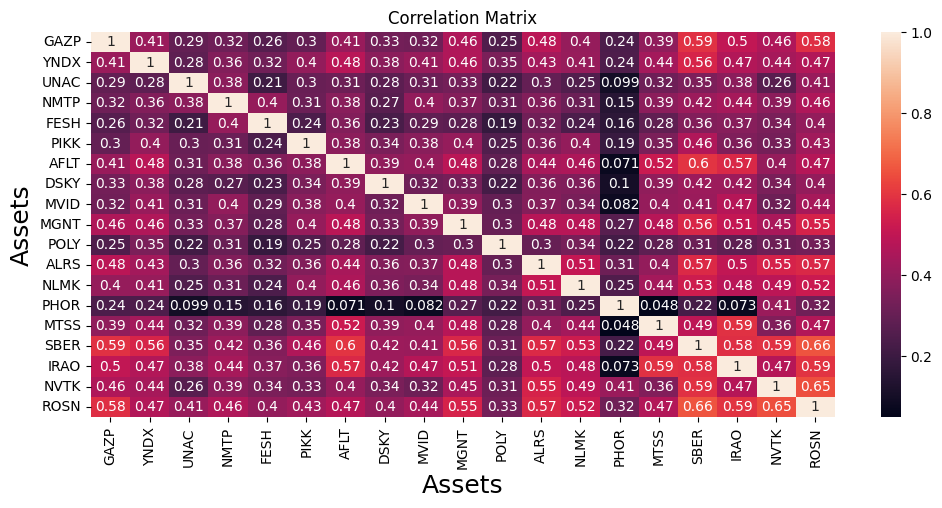

In [55]:
make_corr_mat(df_assets_performance)

In [82]:
assets_cov = df_assets_performance.cov() * 252
assets_cov

,GAZP,YNDX,UNAC,NMTP,FESH,PIKK,AFLT,DSKY,MVID,MGNT,POLY,ALRS,NLMK,PHOR,MTSS,SBER,IRAO,NVTK,ROSN
GAZP,0.161681,0.068892,0.064755,0.052528,0.053909,0.041938,0.064059,0.046990,0.049148,0.062674,0.042649,0.066387,0.052583,0.028505,0.048208,0.089639,0.079677,0.068888,0.087856
YNDX,0.068892,0.171887,0.064953,0.061536,0.067526,0.058510,0.077419,0.055838,0.064893,0.065330,0.061314,0.061353,0.054704,0.029966,0.055351,0.087142,0.076458,0.068480,0.072393
UNAC,0.064755,0.064953,0.307936,0.086920,0.058606,0.059030,0.067553,0.054196,0.065088,0.062005,0.050883,0.055988,0.044964,0.016425,0.054326,0.073561,0.083658,0.054923,0.085875
NMTP,0.052528,0.061536,0.086920,0.168084,0.084300,0.045137,0.060113,0.038590,0.061570,0.050952,0.053420,0.050578,0.041280,0.018125,0.048412,0.064454,0.071621,0.059198,0.070521
FESH,0.053909,0.067526,0.058606,0.084300,0.258928,0.042758,0.071522,0.042049,0.055068,0.047588,0.040305,0.056039,0.039668,0.024556,0.044369,0.069474,0.075321,0.065673,0.076398
PIKK,0.041938,0.058510,0.059030,0.045137,0.042758,0.124495,0.052540,0.042700,0.050324,0.048189,0.037493,0.043645,0.045391,0.020175,0.037601,0.061640,0.049648,0.044026,0.057012
AFLT,0.064059,0.077419,0.067553,0.060113,0.071522,0.052540,0.149699,0.053902,0.059438,0.063624,0.046808,0.058599,0.056918,0.008168,0.062093,0.086953,0.086483,0.058325,0.068860
DSKY,0.046990,0.055838,0.054196,0.038590,0.042049,0.042700,0.053902,0.125071,0.042765,0.039971,0.033256,0.043683,0.040639,0.010635,0.042581,0.055659,0.058658,0.045436,0.053051
MVID,0.049148,0.064893,0.065088,0.061570,0.055068,0.050324,0.059438,0.042765,0.143973,0.050472,0.047724,0.047304,0.041725,0.009226,0.047030,0.059366,0.070916,0.044792,0.062487
MGNT,0.062674,0.065330,0.062005,0.050952,0.047588,0.048189,0.063624,0.039971,0.050472,0.115073,0.043941,0.055455,0.052281,0.026813,0.049609,0.072275,0.068296,0.057100,0.070293


In [83]:
exp_returns['FLB'] = 0.1192

In [84]:
exp_returns

GAZP    0.20375
YNDX    0.24287
UNAC    0.30652
NMTP    0.23771
FESH    0.24206
PIKK    0.23522
AFLT    0.23688
DSKY    0.18748
MVID    0.20649
MGNT    0.24141
POLY    0.22616
ALRS    0.23262
NLMK    0.16116
PHOR    0.24727
MTSS    0.19422
SBER    0.24759
IRAO    0.18994
NVTK    0.25146
ROSN    0.29251
FLB     0.11920
Name: monthly_avg_beta, dtype: float64

In [85]:
assets_cov['FLB'] = np.zeros(19)

In [86]:
assets_cov.loc['FLB'] = np.zeros(20)
assets_cov

,GAZP,YNDX,UNAC,NMTP,FESH,PIKK,AFLT,DSKY,MVID,MGNT,POLY,ALRS,NLMK,PHOR,MTSS,SBER,IRAO,NVTK,ROSN,FLB
GAZP,0.161681,0.068892,0.064755,0.052528,0.053909,0.041938,0.064059,0.046990,0.049148,0.062674,0.042649,0.066387,0.052583,0.028505,0.048208,0.089639,0.079677,0.068888,0.087856,0.0
YNDX,0.068892,0.171887,0.064953,0.061536,0.067526,0.058510,0.077419,0.055838,0.064893,0.065330,0.061314,0.061353,0.054704,0.029966,0.055351,0.087142,0.076458,0.068480,0.072393,0.0
UNAC,0.064755,0.064953,0.307936,0.086920,0.058606,0.059030,0.067553,0.054196,0.065088,0.062005,0.050883,0.055988,0.044964,0.016425,0.054326,0.073561,0.083658,0.054923,0.085875,0.0
NMTP,0.052528,0.061536,0.086920,0.168084,0.084300,0.045137,0.060113,0.038590,0.061570,0.050952,0.053420,0.050578,0.041280,0.018125,0.048412,0.064454,0.071621,0.059198,0.070521,0.0
FESH,0.053909,0.067526,0.058606,0.084300,0.258928,0.042758,0.071522,0.042049,0.055068,0.047588,0.040305,0.056039,0.039668,0.024556,0.044369,0.069474,0.075321,0.065673,0.076398,0.0
PIKK,0.041938,0.058510,0.059030,0.045137,0.042758,0.124495,0.052540,0.042700,0.050324,0.048189,0.037493,0.043645,0.045391,0.020175,0.037601,0.061640,0.049648,0.044026,0.057012,0.0
AFLT,0.064059,0.077419,0.067553,0.060113,0.071522,0.052540,0.149699,0.053902,0.059438,0.063624,0.046808,0.058599,0.056918,0.008168,0.062093,0.086953,0.086483,0.058325,0.068860,0.0
DSKY,0.046990,0.055838,0.054196,0.038590,0.042049,0.042700,0.053902,0.125071,0.042765,0.039971,0.033256,0.043683,0.040639,0.010635,0.042581,0.055659,0.058658,0.045436,0.053051,0.0
MVID,0.049148,0.064893,0.065088,0.061570,0.055068,0.050324,0.059438,0.042765,0.143973,0.050472,0.047724,0.047304,0.041725,0.009226,0.047030,0.059366,0.070916,0.044792,0.062487,0.0
MGNT,0.062674,0.065330,0.062005,0.050952,0.047588,0.048189,0.063624,0.039971,0.050472,0.115073,0.043941,0.055455,0.052281,0.026813,0.049609,0.072275,0.068296,0.057100,0.070293,0.0


In [87]:
ef = EfficientFrontier(exp_returns, assets_cov, weight_bounds=(0,1))
opt_weights = ef.max_sharpe()
# opt_weights

In [88]:
cleaned_opt_weights = ef.clean_weights() 
cleaned_opt_weights

OrderedDict([('GAZP', 0.0),
             ('YNDX', 0.0),
             ('UNAC', 0.0),
             ('NMTP', 0.0),
             ('FESH', 0.0),
             ('PIKK', 0.0),
             ('AFLT', 0.0),
             ('DSKY', 0.0),
             ('MVID', 0.0),
             ('MGNT', 0.0),
             ('POLY', 0.0),
             ('ALRS', 0.0),
             ('NLMK', 0.0),
             ('PHOR', 0.0),
             ('MTSS', 0.0),
             ('SBER', 0.0),
             ('IRAO', 0.0),
             ('NVTK', 0.0),
             ('ROSN', 0.0),
             ('FLB', 1.0)])

In [89]:
ef.portfolio_performance(verbose=True, risk_free_rate=rfr)
# volatility = std(portfolio)

Expected annual return: 11.9%
Annual volatility: 0.0%
Sharpe Ratio: inf


(0.1192, 0.0, inf)

In [90]:
###
df_assets111 = df_assets.copy(); df_benchmark111 = df_benchmark.copy()
ret = expected_returns.capm_return(
    df_assets111, market_prices = df_benchmark111, compounding=False,
    returns_data=False, risk_free_rate=rfr, frequency=252
)
ret * 100

GAZP    10.514355
YNDX    10.699906
UNAC    10.696307
NMTP    10.868512
FESH    10.711578
PIKK    11.163796
AFLT    10.807584
DSKY    11.074163
MVID    10.899972
MGNT    10.916968
POLY    11.137066
ALRS    10.886217
NLMK    11.025732
PHOR    11.514791
MTSS    11.068785
SBER    10.468702
IRAO    10.528598
NVTK    10.677132
ROSN    10.454560
Name: mkt, dtype: float64

In [91]:
###
df_assets112 = df_assets.copy(); df_benchmark112 = df_benchmark.copy()
ret1 = expected_returns.capm_return(
    df_assets112, market_prices = df_benchmark112, compounding=False,
    returns_data=False, risk_free_rate=rfr, frequency=252
)
ret1 * 100 / 12

GAZP    0.876196
YNDX    0.891659
UNAC    0.891359
NMTP    0.905709
FESH    0.892632
PIKK    0.930316
AFLT    0.900632
DSKY    0.922847
MVID    0.908331
MGNT    0.909747
POLY    0.928089
ALRS    0.907185
NLMK    0.918811
PHOR    0.959566
MTSS    0.922399
SBER    0.872392
IRAO    0.877383
NVTK    0.889761
ROSN    0.871213
Name: mkt, dtype: float64

In [ ]:
# asset_returns = expected_returns.capm_return(
#     df_assets, market_prices=df_benchmark, 
#     returns_data=True, risk_free_rate=(0.07/100), frequency=252
# )
# asset_returns

In [ ]:
# from pypfopt import plotting

# cov_matrix2 = risk_models.sample_cov(stock_data)
# print(cov_matrix2)
# type(cov_matrix2)

# plotting.plot_covariance(cov_matrix2, plot_correlation=True);

In [92]:
def make_pie_graph_weights(dict_weights):
    dict_weights_non_zero = {
        key: dict_weights[key] for key in dict_weights if dict_weights[key] != 0
    }

    colors = sns.color_palette('pastel')
    plt.pie(
        dict_weights_non_zero.values(), labels=dict_weights_non_zero.keys(), colors=colors, autopct='%.1f%%'
    )
    plt.show();

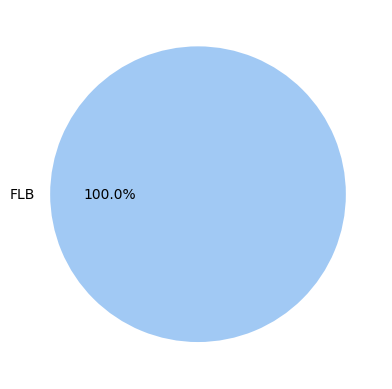

In [93]:
make_pie_graph_weights(cleaned_opt_weights)

In [94]:
ef.portfolio_performance(verbose=True, risk_free_rate=rfr)
# volatility = std(portfolio)

Expected annual return: 11.9%
Annual volatility: 0.0%
Sharpe Ratio: inf


(0.1192, 0.0, inf)

In [66]:
def plot_efficient_frontier(ef):
    fig, ax = plt.subplots()
    ef_max_sharpe = ef.deepcopy()
    plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True, show_tickers=True)

    # Find the tangency portfolio
    ef_max_sharpe.max_sharpe()
    ret_tangent, std_tangent, _ = ef_max_sharpe.portfolio_performance()
    ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")

    # Generate random portfolios
    n_samples = 10000
    w = np.random.dirichlet(np.ones(ef.n_assets), n_samples)
    rets = w.dot(ef.expected_returns)
    stds = np.sqrt(np.diag(w @ ef.cov_matrix @ w.T))
    sharpes = rets / stds
    ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

    # Output
    ax.set_title("Efficient Frontier with random portfolios")
    ax.legend()
    plt.tight_layout()
    # plt.savefig("ef_scatter.png", dpi=200)
    plt.show();

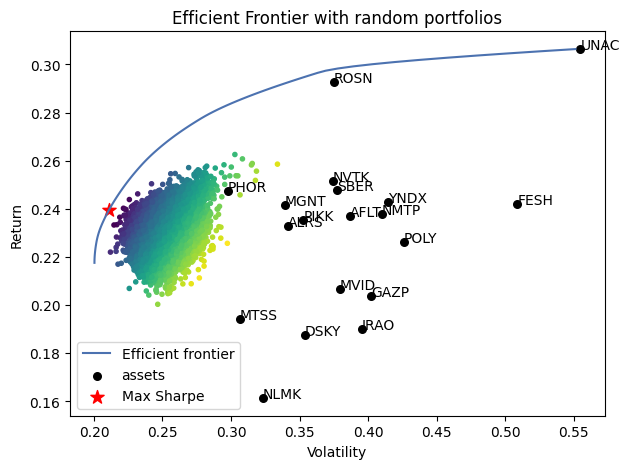

In [67]:
plot_efficient_frontier(
    EfficientFrontier(exp_returns, assets_cov, weight_bounds=(0,1))
)

In [68]:
###
df_assets111 = df_assets.copy(); df_benchmark111 = df_benchmark.copy()
ret = expected_returns.capm_return(
    df_assets111, market_prices = df_benchmark111, compounding=False,
    returns_data=False, risk_free_rate=rfr, frequency=252
)
ret * 100

GAZP    10.514355
YNDX    10.699906
UNAC    10.696307
NMTP    10.868512
FESH    10.711578
PIKK    11.163796
AFLT    10.807584
DSKY    11.074163
MVID    10.899972
MGNT    10.916968
POLY    11.137066
ALRS    10.886217
NLMK    11.025732
PHOR    11.514791
MTSS    11.068785
SBER    10.468702
IRAO    10.528598
NVTK    10.677132
ROSN    10.454560
Name: mkt, dtype: float64

In [69]:
###
df_assets112 = df_assets.copy(); df_benchmark112 = df_benchmark.copy()
ret1 = expected_returns.capm_return(
    df_assets112, market_prices = df_benchmark112, compounding=False,
    returns_data=False, risk_free_rate=rfr, frequency=252
)
ret1 * 100 / 12

GAZP    0.876196
YNDX    0.891659
UNAC    0.891359
NMTP    0.905709
FESH    0.892632
PIKK    0.930316
AFLT    0.900632
DSKY    0.922847
MVID    0.908331
MGNT    0.909747
POLY    0.928089
ALRS    0.907185
NLMK    0.918811
PHOR    0.959566
MTSS    0.922399
SBER    0.872392
IRAO    0.877383
NVTK    0.889761
ROSN    0.871213
Name: mkt, dtype: float64

In [71]:
# Итоговые веса обозначены переменной: cleaned_opt_weights

OrderedDict([('GAZP', 0.0),
             ('YNDX', 0.0),
             ('UNAC', 0.0596),
             ('NMTP', 0.03028),
             ('FESH', 0.01669),
             ('PIKK', 0.10102),
             ('AFLT', 0.05943),
             ('DSKY', 0.03926),
             ('MVID', 0.02995),
             ('MGNT', 0.04313),
             ('POLY', 0.03791),
             ('ALRS', 0.00954),
             ('NLMK', 0.0),
             ('PHOR', 0.41071),
             ('MTSS', 0.12033),
             ('SBER', 0.0),
             ('IRAO', 0.0),
             ('NVTK', 0.0),
             ('ROSN', 0.04216)])